# Lecture 1 Bayesian Modeling 

# Introduction

In this notebook we will discuss linear models and models that are based on Normal distribution.

Gaussians and Linear Gaussian Models are used in
- Probability density estimation: Given $x_1, ..., x_N$, estimate p(x) assuming Gaussian likelihood/noise
- Given N sensor observations $x_n$ with $x_n=\mu+\epsilon_n$ estimate the value of $\mu$
- Estimating missing data
- Linear Regression with Gaussian Likelihood
- Linear latent variable models (probabilistic PCA, factor analysis, Kalman filters) and their mixtures
$x_n = Wz_n + \epsilon_n$ ($z_n$ is Gaussian low-dimimensional K x 1 latent variable,  $\epsilon_n$ is D x 1 independent Gaussian noise)
- Gaussian Processes (GP) extensively use Gaussian conditioning and marginalization rules
- More complex models where parts of the model use Gaussian likelihoods/priors


# Gaussian distribution
The Gaussian distribution or normal error function is a two-parameter distribution given by:

$$\mathcal{N}(x\,;\,\mu,\sigma)=\, \frac{1}{\sigma (2\pi)^{\frac{1}{2}}} exp\big[ -\frac{(x-\mu)}{\sigma}\big]^2$$

$\mu$ and $\sigma$ are the mean and standard deviation of the random variable X. 

It is used to model events which occur **by chance** such as variation of dimensions of mass-produced items during manufacturing, experimental errors, variability in measurable biological characteristics such as people’s height or weight,... Of great practical import is that normal distributions apply in situations where the random variable is the result of a sum of several other variable quantities acting independently on the system.

In [190]:
using Distributions, Plots; 
using Turing
using StatisticalRethinking
using Random, Plots, MCMCChains

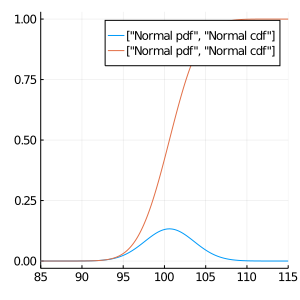

In [191]:
xGrid = -85:0.1:115
pdfnormalDensity(z) = pdf(Normal(100.6,3),z)
cdfnormalDensity(z) = cdf(Normal(100.6,3),z)
pdf_normal=pdfnormalDensity.(xGrid)
cdf_normal=cdfnormalDensity.(xGrid)
plot(xGrid, [pdf_normal, cdf_normal], xlims=(85,115), label=["Normal pdf", "Normal cdf"], size=(300, 300))

#### Example:
Graphical interpretation of probability using the standard normal table
Resistors made by a certain manufacturer have a nominal value of 100 ohms but their actual values are normally distributed with a mean of $\mu \,=100.6$ ohms and standard deviation $\sigma=3$ ohms. Find the percentage of resistors that will have
values higher than the nominal rating. 



In [192]:
1-cdf(Normal(100.6,3),100)

0.5792597094391023

-----------------------------------------------------------

## Covariance 
The measure of joint variability between two random variables is called covariance. 
These variables shows similar behaviour when the greater values in one variable correspond to the greater values of another variable, this type of behaviour tells the covariance is positive. Covariance explains linear relationship between the variables.

The covariance is denoted by $Cov(X,Y)$, where $X$ and $Y$ are random variables.
Covariance is defined as  

$$ Cov(X,Y)=E[(X-E[X])(Y-E[Y])] $$

If Cov(X,Y)=0 then the two random variables $X$ and $Y$ are said to be uncorrelated. As we know 

$$Cov(X,Y)=E[(X-E[X])(Y-E[Y])$$

$$=E[XY-XE[Y]-E[X]Y+E[X]E[Y]]$$

$$=E[XY]-E[X]E[Y]-E[X]E[Y]+E[X]E[Y]$$

$$=E[XY]-E[X]E[Y]$$

This is another formula for covariance

$$Cov(X,Y)=E[XY]-E[X]E[Y]$$

### PROPERTIES OF COVARIANCE

1)If the two variables are identical then the covariance of the two variables is equal to the variance of the single variable

$$Cov(X,X)= var(X)= \sigma_X^2$$

2)Let us Consider $X$,$Y$ as real valued random variables and a,b as constants then some of the definitions of covariance will be

$$Cov(X,a)=0$$

$$Cov(X,X)=var(X)$$

$$Cov(X,Y)=Cov(Y,X)$$

$$Cov(aX,bY)=ab \cdot Cov(X,Y)$$

$$Cov(X+a,Y+b)=Cov(X,Y)$$

$$Cov(X,aY+b)=a \cdot Cov(X,Y)$$

$$Cov(X,Y+Z)=Cov(X,Y)+Cov(X,Z)$$



3)The covariance of two independent random variables is zero.this can be derived by using the formula of mean.
if two variables $X$,$Y$ are independent then $E[XY]=E[X] \cdot E[Y]$

$$cov(X,Y)=0$$

4) If $X_1$,$X_2$,$X_3$,$X_4$,........$X_{n-1}$,$X_n$ are n random variables then the variance of sum of those variables is given by

$$var(X_1+X_2+......+X_n)= \sum_{i=1}^{n} var(X_i)+ \sum_{(i,j):i \neq j} Cov(X_i,X_j)$$

By using this the variance of a sum of two random varibles $X_1$,$X_2$ is

$$var(X_1+X_2)=var(X_1)+var(X_2)+2Cov(X_1,X_2)$$

## Correlation Coefficient and it's interpretation

### Correlation

The numerical measurement of the statistical relationship between two variables(Correlation) is known as correlation coefficient.

There are many types of correlation but we generally use Pearson product-moment Correlation. The value of correlation coefficient varies between -1 to 1.

The correlation coefficient of two random variables $X$,$Y$ which are having non zero variances is defined as

$$\rho (X,Y)= \frac{Cov(X,Y)}{\sqrt{var(X)var(Y)}}$$

$$\rho (X,Y)= \frac{Cov(X,Y)}{\sigma_X . \sigma_Y}$$


If the random variables $X$ , $Y$ are independent then their correlation coefficient is $\rho$=0

Correlation coefficient is defined as the m
easure of degree of "association" between the  random variables $X$ and $Y$.

If the correlation correlation coefficient of two random variables $X$,$Y$ is 1 i.e $\rho$=1 then they are said to be linearly dependent.



## Multivariate normal distribution

Multivariate normal distribution is defined as:

$$ f({\bf x})=\frac{1}{\sqrt{(2\pi)^n|\boldsymbol\Sigma|}}
\exp\left(-\frac{1}{2}({\bf x}-{\bf \mu})^T{\boldsymbol\Sigma}^{-1}({\bf x}-{\bf \mu})
\right)
$$

where ${\bf x}$ is a vector of $n$ random elements ${\bf x}=(X_1, X_2, ..., X_n)$, ${\bf \mu}=(E(X_1),E(X_2,…,E(X_n))$ and $\Sigma_{ij}=Cov(X_i,X_j)$.

The covariance matrix of a multivariate normal distribution can be written as
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \Sigma_{12} & \cdots & \Sigma_{1n} \\
  \Sigma_{21} &\sigma_2^2 & \cdots & \Sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \Sigma_{n1} & \Sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$


#### Example 
Let us present the multivariate Normal distribution for n=2 and for the following values of  $\Sigma$: \
a) No correlation $$\Sigma = \begin{bmatrix}3&0\\0&2\end{bmatrix}$$

b) Positive correlation 

$$\Sigma = \begin{bmatrix}3&0.6\\0.6&2\end{bmatrix}$$

c) Negative correlation 

$$\Sigma = \begin{bmatrix}3&-2.7\\-2.7&2\end{bmatrix}$$

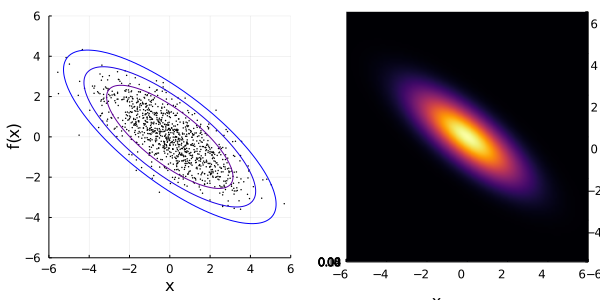

In [193]:
Σ=[[3,-1.9] [-1.9,2]]
μ=[0,0]
biNorm = MvNormal(μ,Σ)

N = 10^3
points = rand(MvNormal(μ,Σ),N)

support = -6:0.1:6
z = [ pdf(biNorm,[x,y]) for y in support, x in support ]

p1 = scatter(points[1,:], points[2,:], ms=1, c=:black, legend=:none)
p1 = contour!(support, support, z,
    levels=[0.001, 0.005, 0.02], c=[:blue, :red, :green],
    xlims=(-6,6), ylims=(-6,6), ratio=:equal, legend=:none,
    xlabel="x", ylabel="f(x)")
p2 = surface(support, support, z, legend=:none, xlabel="x", ylabel="f(x)",camera=(-6,6))

plot(p1, p2, size=(600, 300))

### Properties of Normal Distribution
Please see the following link for the properties of the Normal distribution: [Properties of Gaussian Distribution](https://uppsala.instructure.com/courses/28106/files/1088842/download?wrap=1).

These properties will be used to obtain marginal distribution, to multiply Normal distributions and so on. 


# Besian inference for Normal i.i.d observations

Let's estimate a parameter $\theta$ from n 'noisy' measurement $x$. 

Let us assume the following measurement equations for n measurements:
$$\begin{align*}
x_i &= \theta + \epsilon_i \\
\epsilon_i &\sim \mathcal{N}(0,\sigma^2)
\end{align*}$$

Also, let's assume a Gaussian prior for $\theta$
$$\begin{align*}
\theta &\sim \mathcal{N}(\mu_0,\sigma_0^2) \\
\end{align*}$$

This is equivalent in probabilistic notation to:

$$\begin{align}
    p(x_i|\theta) &=  \mathcal{N}(x_i|\theta,\sigma^2) \tag{likelihood}\\
    p(\theta) &=\mathcal{N}(\theta|\mu_0,\sigma_0^2) \tag{prior}
\end{align}$$

## Bayesian inference for the mean of Gaussian

We are interested in determining the mean of the Gaussians with **known variance**. Here, $\theta=\mu$.
Let us draw N i.i.d. data points $X=\{x_1, x_2, ..., x_N\}$ from one dimensional Gaussian distribution $\mathcal{N}(x_i|\mu,\sigma^2)$.

We wish to estimate the unknown $\mu$ given the data X.


Phe posterior distribution for the unknown mean parameter μ is:
$$
p(\mu | \mathbf{X})=\frac{p(\mathbf{X} | \mu) p(\mu)}{p(\mathbf{X})} \propto \prod_{n=1}^{N} \exp \left[-\frac{\left(x_{n}-\mu\right)^{2}}{2 \sigma^{2}}\right] \times \exp \left[-\frac{\left(\mu-\mu_{0}\right)^{2}}{2 \sigma_{0}^{2}}\right]
$$

The product of two Gaussian distributions is also Gaussian means $\mu_N$ and variance $\sigma_N$. The mean and the variance of the product are given in [Section 3 Properties for the scalar Gaussian -> Property 3]((https://uppsala.instructure.com/courses/28106/files/1088842/download?wrap=1)). Therefore:

$$
\frac{1}{\sigma_{N}^{2}}=\frac{1}{\sigma_{0}^{2}}+\frac{N}{\sigma^{2}}
$$
$$
\mu_{N}=\frac{\sigma^{2}}{N \sigma_{0}^{2}+\sigma^{2}} \mu_{0}+\frac{N \sigma_{0}^{2}}{N \sigma_{0}^{2}+\sigma^{2}} \bar{x},\      \bar{x}=\frac{\sum_{n=1}^{N} x_{n}}{N}
$$
From the property of Gaussian distribution we know that $\mu = \mu_{N}$ would make the function get maximum.
$$\mu_{MAP} = \mu_{N}=\frac{\sigma^{2}}{N \sigma_{0}^{2}+\sigma^{2}} \mu_{0}+\frac{N \sigma_{0}^{2}}{N \sigma_{0}^{2}+\sigma^{2}} \bar{x}$$


Interpretation of the computed mean is important. We can rewrite it as:
$$ \mu_{N}=\frac{\sigma_N^{2}}{\sigma_{0}^{2}} \mu_{0}+\frac{ \sigma_{N}^{2}}{\sigma^{2}/N} \bar{x}$$

and therefore can be interpreted as:
$$ Posterior\:mean = \frac{Posterior\:variance}{Prior\:variance}\cdot(Prior\:mean) + \frac{Posterior\:variance}{Data\:variance}\cdot(Data\:mean) $$

or, even more intuitively:

$$ Posterior\:mean = \frac{Prior\:precision}{Posterior\:precision}\cdot(Prior\:mean) + \frac{Data\:precision}{Posterior\:precision}\cdot(Data\:mean) $$

Also, if we define weight $w=\frac{\sigma_{N}^{2}}{\sigma^{2}/N}$ then:
$$ \mu_{N}=(1-w)\cdot \mu_0+ w \cdot\bar{x}$$

Consider what happens as N (number of observations) grows very large?\
- The posterior's variance approaches $\sigma^2/N$
- The posterior's mean approaches $\bar{x}$ (which is also the MLE solution)

Even further, we can interpret the posterior mean as the prior mean plus the updated error between the maximum likelihood estimate (data mean) and the prior mean:
$$\begin{align*}
  \underbrace{\mu_N}_{\text{posterior}}   &= 
  &= \underbrace{\mu_0}_{\text{prior}} + \underbrace{\underbrace{w}_{\text{gain}}\cdot \underbrace{\left(\bar{x} - \mu_0 \right)}_{\text{prediction error}}}_{\text{correction}}
\end{align*}$$

#### Example
- Data rate when downloading: X = (32, 30, 35, 22, 40) Mbit/sec.
- Model: $X \sim \mathcal{N}(\mu, \sigma^2)$.
- Let us assume known fixed variance of $\sigma=5$. This means that we assume that the data rate can vary $ \pm10$ Mbit/sec with $95\%$ confidence. 
- Prior: $\mu \sim \mathcal{N}(60, 7^2)$. 

In [194]:
μ0=60
σ0=7
σ=5
x = [32, 30, 35, 22, 40]
##
@model normal_mean(x) = begin
    # Our prior belief about the probability of heads in a coin.
    μ ~ Normal(μ0, σ0)
    # Heads or tails of a coin are drawn from a Bernoulli distribution.
    x ~ Normal(μ, σ)
end;

In [195]:
# Sampling from the model and indering the posterior distribution
chain = sample(normal_mean(x), HMC(0.05, 10), 2000);

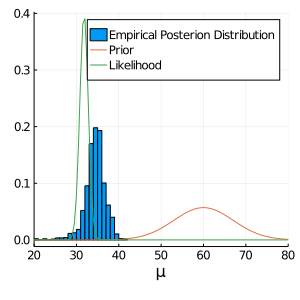

In [196]:
## Draw posterior distribution
p_summary = chain[:μ]
histogram(p_summary, xlabel="μ", bins=40, normed=true, label="Empirical Posterion Distribution")

xGrid = 20:0.5:80
pdfprior(z) = pdf(Normal(μ0,σ0),z)
prior=pdfprior.(xGrid)
pdfL(z)=pdf(Normal(mean(x),σ/length(x)),z)
likelihood=pdfL.(xGrid)
plot!(xGrid, prior, xlims=(20,80), label="Prior", size=(300, 300))
plot!(xGrid, likelihood, xlims=(20,80), label="Likelihood", size=(300, 300))

### Posterior predictive distribution

Posterior predictive for a new observation $x_*$ is also Gaussian:

$$\begin{align*}
    p(x_*|X)=\int_{\mu} p(x_*|\mu,\sigma^2)\,p(\mu|X)\,\mathrm{d}\mu 
            = \int_{\mu} \mathcal{N}(x_*|\mu,\sigma^2)\,\mathcal{N}(\mu|\mu_N,\sigma_N^2)\,\mathrm{d}\mu
\end{align*}$$

If we look at the [Corollary 2 and theorem 3]((https://uppsala.instructure.com/courses/28106/files/1088842/download?wrap=1)) and have A=1, b=1, $x_a=\mu$ and $x_b=x_*$ we get:
$$ \mu_*=\mu_N $$ and
$$ \sigma_*^2=\sigma_N^2+\sigma^2$$

Therefore, if posterior predictive can be presented as:

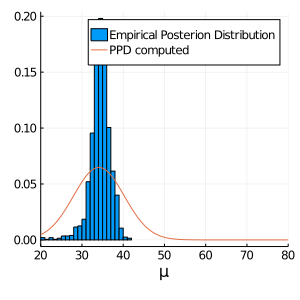

In [197]:
# Computation of PPD - where do we expect next data points to be
histogram(p_summary, xlabel="μ", bins=40, normed=true, label="Empirical Posterion Distribution")
meanPPD=mean(p_summary)
stdPPD=sqrt(σ^2+std(p_summary)^2)
pdfPPD(z) = pdf(Normal(meanPPD,stdPPD),z)
PPD=pdfPPD.(xGrid)

plot!(xGrid, PPD, xlims=(20,80), label="PPD computed", size=(300, 300))


## Linear Gaussian Model

Let us now consider linear multivariate Gaussian model in which we are interested in the random variable ${\bf z}$ (where $p({\bf z})=\mathcal{N}({\bf z}|{\bf \mu},{\bf \Lambda^{-1}})$:

$$ {\bf x}={\bf A}{\bf z}+{\bf b}+{\bf \epsilon} $$

where $p({\bf \epsilon})=\mathcal{N}({\bf \epsilon}|{\bf 0},{\bf L^{-1}})$

It is easy to present the likelihood of the model:
$$p({\bf x}|{\bf z})=\mathcal{N}({\bf x}|{\bf A}{\bf \mu}+{\bf b},{\bf L^{-1}})$$

Now, let us use If we look at the [Corollary 1 and theorem 3]((https://uppsala.instructure.com/courses/28106/files/1088842/download?wrap=1)) to determine the posterior distribution (we assume that $x_a={\bf z}$ and $x_b={\bf x}$):

$$p({\bf z}|{\bf x})=\mathcal{N}({\bf z}|{\bf \mu_z},{\bf \Sigma})$$

where 
$$ {\bf \Sigma} = ({\bf \Lambda}+{\bf A^T}{\bf L}{\bf A})^{-1}$$

$$ {\bf \mu_z}={\bf \Sigma}[{\bf A^T}{\bf L}({\bf x}-{\bf b})+ {\bf \Lambda}{\bf \mu}] $$

With this, we can easily generalize our inference problem to 2 dimensional or multidimensional problems.

We can also find $p({\bf x})$ analytically using [Corollary 2]((https://uppsala.instructure.com/courses/28106/files/1088842/download?wrap=1).

# Inference with Multiple Parameters
## Gaussian model with unknown mean and variance

Our goal is to determine the mean and precision of a univariate Gaussian $\mathcal{N}(x|\mu,\lambda^{-1})$ given N i.i.d. data points $X=\{x_1,...,x_N\}$ and let us assume here that $\lambda=1/\sigma^2$.

Likelihood can be presented as:
$$ p(x_1, \ldots, x_n \mid \mu, \lambda) = \prod_{i = 1}^N
\sqrt{\frac{\lambda}{2 \pi}}
e^{\{- \frac{\lambda}{2} (x_i - \mu)^2\}}
$$

which can further be written as:
$$ p(X \mid \mu, \lambda) \propto (\lambda)^{N/2}  \times \exp{\{-\frac{\lambda}{2} \sum_{i = 1}^N(x_i - \bar{x})^2 \}}
 \times \exp{\{ -\frac{\lambda}{2} N (\bar{x} - \mu)^2 \}}
$$

Based on the factorization in the likelihood and the fact that any joint distribution for μ and $\lambda$ can be expressed as 
$$ p(\mu, \lambda)= p(\mu| \lambda)\cdot p(\lambda)$$

We choose conjugate prior for $\mu$ to be Normal distribution:
$$
\mu \mid \lambda   \sim \mathcal{N}(\mu|\mu_0, (k_0\lambda)^{-1})
$$

The hyper-parameter $k_0$ is unitless, but is used to express our prior precision about μ relative to the level of “noise”, captured by $\lambda$, in the data. Larger values of $k_0$ indicate that we know the mean with more precision (relative to the variability in observations) with smaller values indicating less precision or more uncertainty.

Precision is modelled using Gamma distribution. Since the precision is non-negative, continuous, and with no upper limit, a gamma distribution might appear to be a candidate prior for the precision. In addition, Gamma distribution is the conjugate prior for the Normal likelihood. [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) can be described using shape parameter $\alpha$ and a rate parameter $\beta$. 
$$ \lambda \sim \textsf{Gamma}\left(\lambda|\alpha_0,\beta_0 \right)$$

The prior distribution is sometimes called Normal-Gamma distribution. 

It can be shown that the posterior distribution is the same due to conjugacy. THerefore, we can write:
$$
p(\mu,\lambda|X)=\mathcal{N}(\mu|\mu_N, (k_N\lambda)^{-1})\textsf{Gamma}\left(\lambda|\alpha_N,\beta_N \right)
$$

where:

\begin{eqnarray*}
\mu_n & = & \frac{N \bar{x} + k_0 \mu_0} {N + k_0}  \\
& \\
k_n & = & k_0 + N  \\
\alpha_n & = & \alpha_0 + N/2  \\
\beta_n & =  \beta_0+\frac{1}{2}\sum_{n=1}^{N} (x_n-\bar{x})^2+\frac{k_0N(\bar{x}-\mu_0)^2}{2(k_0+N)}. 
\end{eqnarray*}

We can also marginalize and find the posterior over a single parameter. Parameter $\lambda$ in this case follows Gaussian distribution, while the parameters $\mu$ follows t-distribution. t-distribution resembles normal distribution but it has heavier tails.

$$
p(\lambda|X)=\textsf{Gamma}\left(\lambda|\alpha_N,\beta_N \right)
$$
$$
p(\mu|X)=\mathcal{t}(\mu|2\alpha_N, \mu_N, \beta_N/(\alpha_N k_n))
$$

For more details, please see [An Introduction to Bayesian Thinking](https://statswithr.github.io/book/inference-and-decision-making-with-multiple-parameters.html).

#### Example
We will use an example from [2] called seven scientists. Seven scientists  make a measurement of the same quantity. They get the answers x = {−27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056}. The  problem is to find the posterior distribution over the measured quantity,
telling us what we can infer from the measurement. A secondary problem is to infer something about the measurement skills of the seven scientists.


![title](images/SevenScientists.png)

Let us try first the implementation in which we assume that there is only one $\lambda$. In this case, we expect that the mean will be around the sample mean which is 3.46

In [198]:
μ0=0
σ0=1/0.001
α0=0.001
β0=0.001
x = [-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056]

@model seven_scientists(x) = begin
    μ ~ Normal(μ0, σ0)
    l ~ Gamma(α0,1/β0)
    x ~ Normal(μ, 1/sqrt(l))
end;


In [199]:
model = seven_scientists(x)
chain = sample(model, NUTS(0.65), 3000);

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference C:\Users\Miodrag Bolic\.julia\packages\Turing\O1Pn0\src\inference\hmc.jl:195


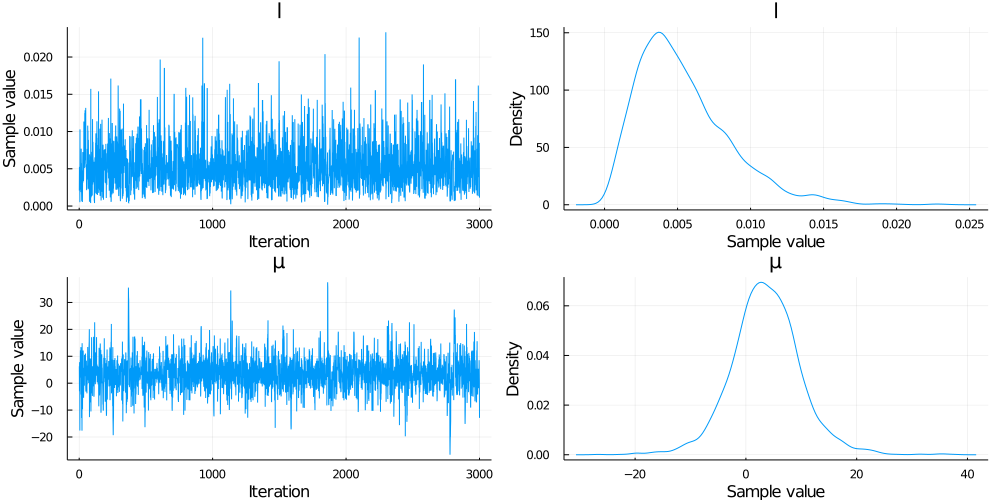

In [200]:
plot(chain)

In [201]:
summarystats(chain)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

           l    0.0054    0.0032     0.0001    0.0001   1702.5123    0.9997
           μ    3.6175    6.3065     0.1151    0.1672   1289.4559    0.9997


Now, let us look at the problem given above where the precision for each scientist is considered separately.

In [202]:
@model seven_scientists1(x) = begin
    # Our prior belief about the probability of heads in a coin.
    μ ~ Normal(μ0, σ0)
    N = length(x)
    l = Vector{Real}(undef, N)
    for j in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        #l[j] ~ Gamma(α0,1/β0)
        l[j] ~ Uniform(0,30)
        x[j] ~ Normal(μ, 1/sqrt(l[j]))
    end
end;

In [203]:
# Sampling from the model and indering the posterior distribution
model = seven_scientists1(x)
chain = sample(model, NUTS(0.65), 5000);

┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\Miodrag Bolic\.julia\packages\Turing\O1Pn0\src\inference\hmc.jl:195
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\Miodrag Bolic\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\Miodrag Bolic\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\Miodrag Bolic\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47


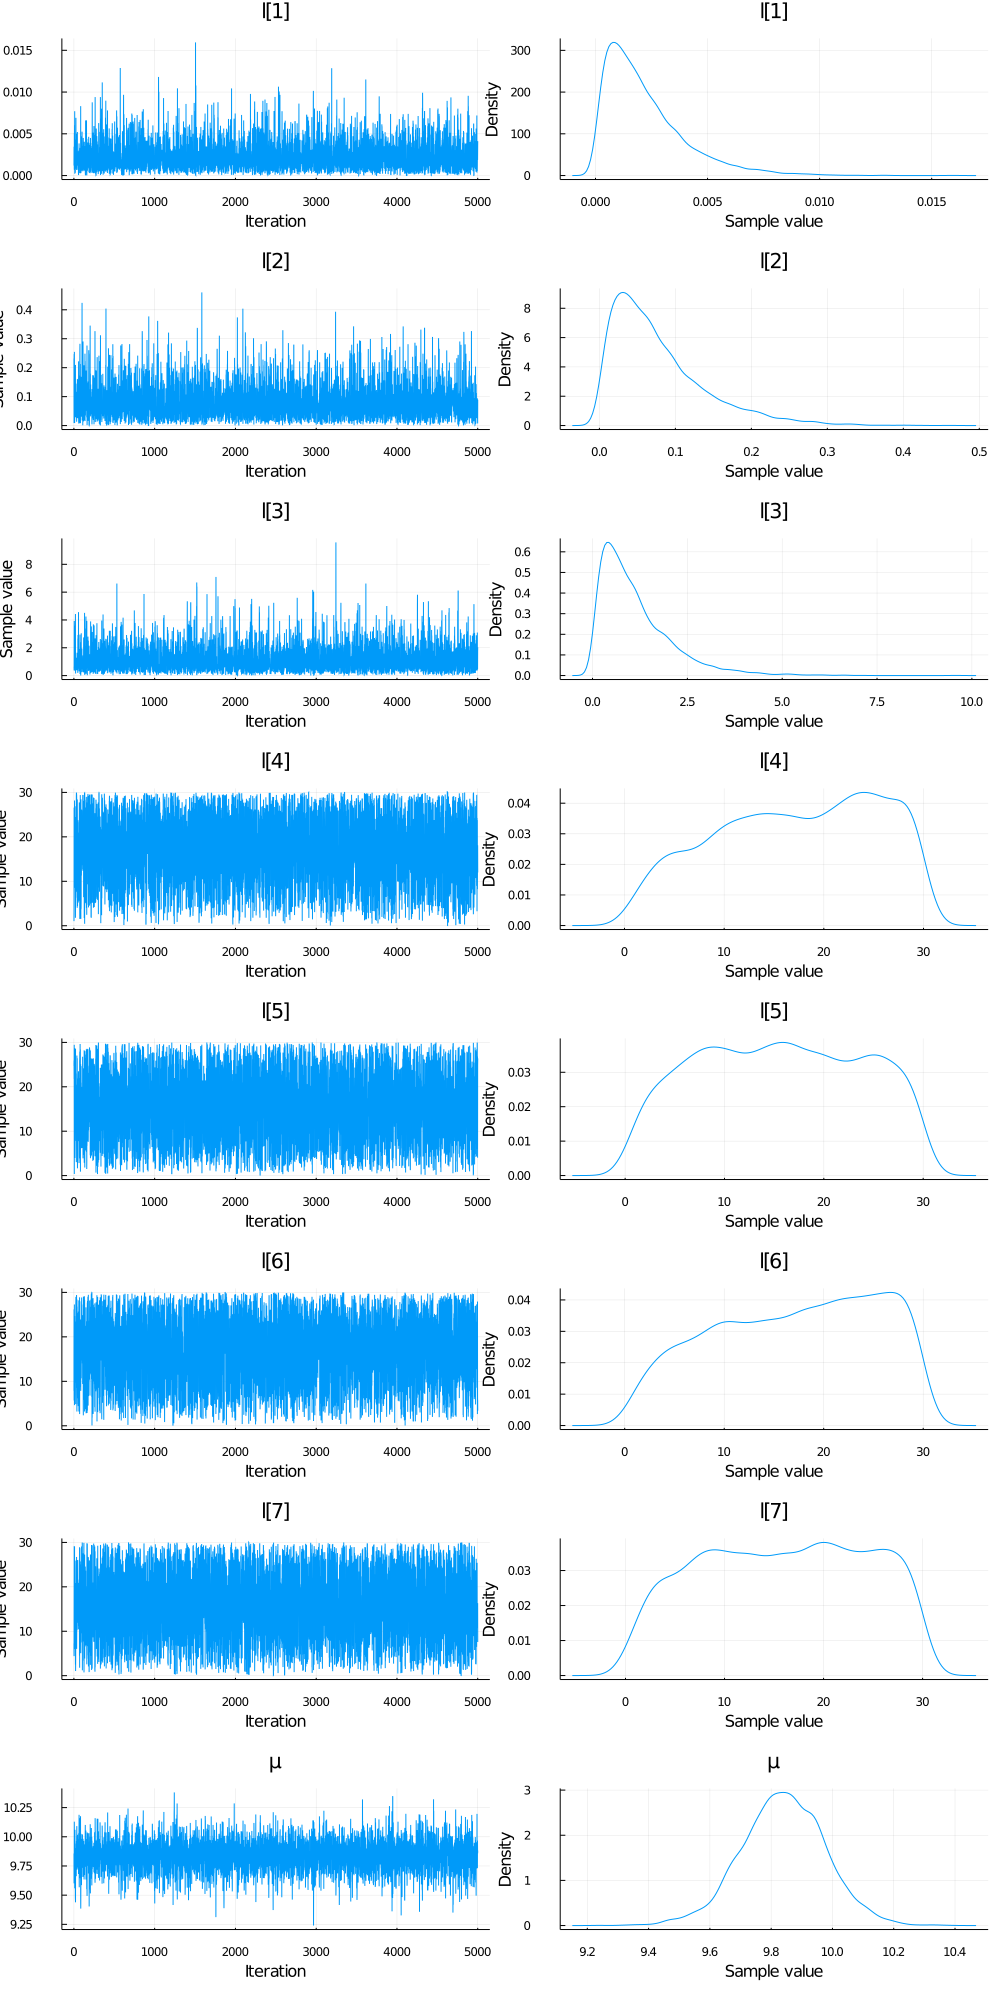

In [204]:
plot(chain)

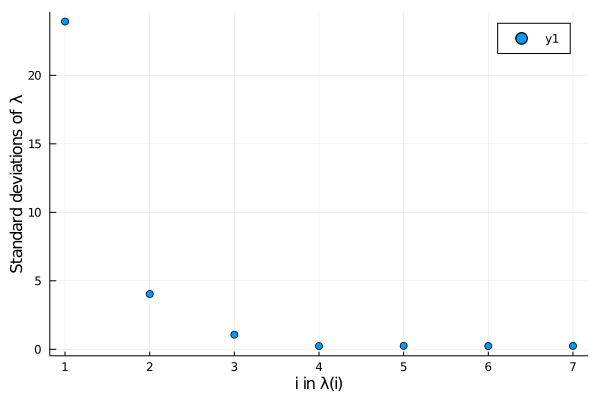

In [205]:
x1 = get(chain, :l)
scient_std=Vector{Real}(undef, length(x))
for j=1:length(x)
    scient_std[j]=1/sqrt(median(x1.l[j]))
end
plot(1:length(x), scient_std, seriestype = :scatter, xlabel="i in λ(i)", ylabel = "Standard deviations of λ")

## References
[1] Slides of Basics of Probabilistic/Bayesian Modeling and Parameter Estimation by Piyush Rai

[2] Michael D. Lee, Eric-Jan Wagenmakers, Bayesian Cognitive Modeling: A Practical Course, 2013.

[3] Kevin P. Murphy, Machine learning: a probabilistic perspective, Second Edition, 2021.

[4] [An Introduction to Bayesian Thinking](https://statswithr.github.io/book/inference-and-decision-making-with-multiple-parameters.html)

